In [1]:
baseball = read.csv("./data/baseball.csv")

In [2]:
str(baseball)

'data.frame':	1232 obs. of  15 variables:
 $ Team        : Factor w/ 39 levels "ANA","ARI","ATL",..: 2 3 4 5 7 8 9 10 11 12 ...
 $ League      : Factor w/ 2 levels "AL","NL": 2 2 1 1 2 1 2 1 2 1 ...
 $ Year        : int  2012 2012 2012 2012 2012 2012 2012 2012 2012 2012 ...
 $ RS          : int  734 700 712 734 613 748 669 667 758 726 ...
 $ RA          : int  688 600 705 806 759 676 588 845 890 670 ...
 $ W           : int  81 94 93 69 61 85 97 68 64 88 ...
 $ OBP         : num  0.328 0.32 0.311 0.315 0.302 0.318 0.315 0.324 0.33 0.335 ...
 $ SLG         : num  0.418 0.389 0.417 0.415 0.378 0.422 0.411 0.381 0.436 0.422 ...
 $ BA          : num  0.259 0.247 0.247 0.26 0.24 0.255 0.251 0.251 0.274 0.268 ...
 $ Playoffs    : int  0 1 1 0 0 0 1 0 0 1 ...
 $ RankSeason  : int  NA 4 5 NA NA NA 2 NA NA 6 ...
 $ RankPlayoffs: int  NA 5 4 NA NA NA 4 NA NA 2 ...
 $ G           : int  162 162 162 162 162 162 162 162 162 162 ...
 $ OOBP        : num  0.317 0.306 0.315 0.331 0.335 0.319 0.305 0.3

### 如何预测胜场数？

只用2002年以前的数据。

In [4]:
moneyball = subset(baseball, Year < 2002)
str(moneyball)

'data.frame':	902 obs. of  15 variables:
 $ Team        : Factor w/ 39 levels "ANA","ARI","ATL",..: 1 2 3 4 5 7 8 9 10 11 ...
 $ League      : Factor w/ 2 levels "AL","NL": 1 2 2 1 1 2 1 2 1 2 ...
 $ Year        : int  2001 2001 2001 2001 2001 2001 2001 2001 2001 2001 ...
 $ RS          : int  691 818 729 687 772 777 798 735 897 923 ...
 $ RA          : int  730 677 643 829 745 701 795 850 821 906 ...
 $ W           : int  75 92 88 63 82 88 83 66 91 73 ...
 $ OBP         : num  0.327 0.341 0.324 0.319 0.334 0.336 0.334 0.324 0.35 0.354 ...
 $ SLG         : num  0.405 0.442 0.412 0.38 0.439 0.43 0.451 0.419 0.458 0.483 ...
 $ BA          : num  0.261 0.267 0.26 0.248 0.266 0.261 0.268 0.262 0.278 0.292 ...
 $ Playoffs    : int  0 1 1 0 0 0 0 0 1 0 ...
 $ RankSeason  : int  NA 5 7 NA NA NA NA NA 6 NA ...
 $ RankPlayoffs: int  NA 1 3 NA NA NA NA NA 4 NA ...
 $ G           : int  162 162 162 162 161 162 162 162 162 162 ...
 $ OOBP        : num  0.331 0.311 0.314 0.337 0.329 0.321 0.334 0.3

`run difference` = `run scores - runs allowed`

In [5]:
moneyball$RD = moneyball$RS - moneyball$RA

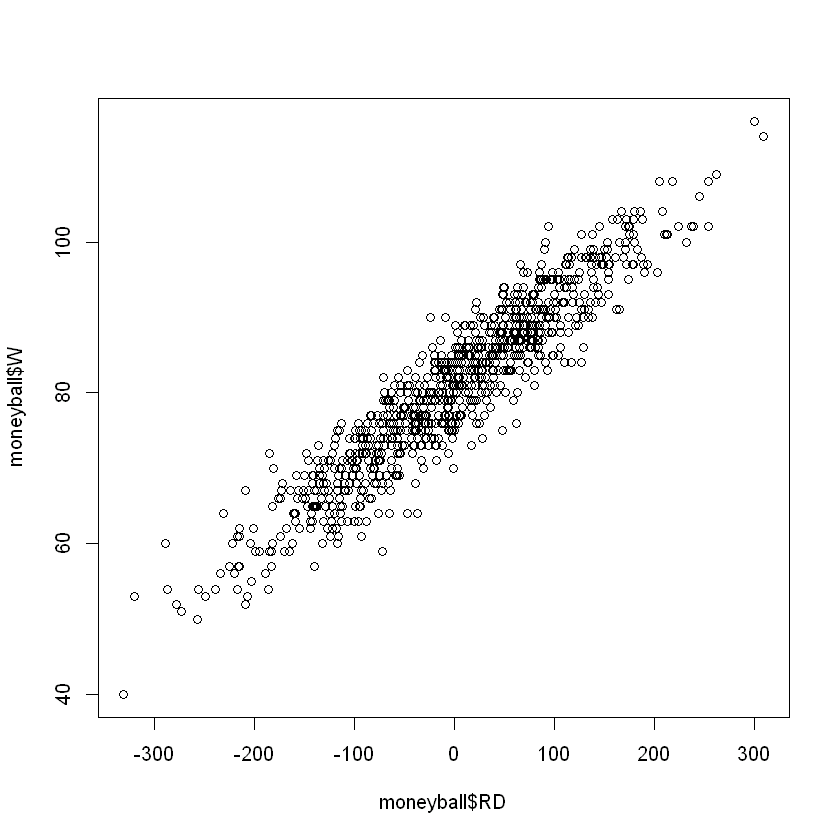

In [6]:
plot(moneyball$RD, moneyball$W)

In [8]:
WinsReg = lm(W ~ RD, data=moneyball)
summary(WinsReg)


Call:
lm(formula = W ~ RD, data = moneyball)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.2662  -2.6509   0.1234   2.9364  11.6570 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 80.881375   0.131157  616.67   <2e-16 ***
RD           0.105766   0.001297   81.55   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.939 on 900 degrees of freedom
Multiple R-squared:  0.8808,	Adjusted R-squared:  0.8807 
F-statistic:  6651 on 1 and 900 DF,  p-value: < 2.2e-16


R方很高，因此用`run difference`预测胜场数应该是很靠谱的。

`W = 80.8814 + 0.1058 * RD`

所以`RD >= 133.4`时，`W >= 95`。

### 如何预测 scoring runs？

通过`OBP SLG BA`。

In [10]:
str(moneyball)

'data.frame':	902 obs. of  16 variables:
 $ Team        : Factor w/ 39 levels "ANA","ARI","ATL",..: 1 2 3 4 5 7 8 9 10 11 ...
 $ League      : Factor w/ 2 levels "AL","NL": 1 2 2 1 1 2 1 2 1 2 ...
 $ Year        : int  2001 2001 2001 2001 2001 2001 2001 2001 2001 2001 ...
 $ RS          : int  691 818 729 687 772 777 798 735 897 923 ...
 $ RA          : int  730 677 643 829 745 701 795 850 821 906 ...
 $ W           : int  75 92 88 63 82 88 83 66 91 73 ...
 $ OBP         : num  0.327 0.341 0.324 0.319 0.334 0.336 0.334 0.324 0.35 0.354 ...
 $ SLG         : num  0.405 0.442 0.412 0.38 0.439 0.43 0.451 0.419 0.458 0.483 ...
 $ BA          : num  0.261 0.267 0.26 0.248 0.266 0.261 0.268 0.262 0.278 0.292 ...
 $ Playoffs    : int  0 1 1 0 0 0 0 0 1 0 ...
 $ RankSeason  : int  NA 5 7 NA NA NA NA NA 6 NA ...
 $ RankPlayoffs: int  NA 1 3 NA NA NA NA NA 4 NA ...
 $ G           : int  162 162 162 162 161 162 162 162 162 162 ...
 $ OOBP        : num  0.331 0.311 0.314 0.337 0.329 0.321 0.334 0.3

In [12]:
RunsReg = lm(RS ~ OBP + SLG + BA, data=moneyball)
summary(RunsReg)


Call:
lm(formula = RS ~ OBP + SLG + BA, data = moneyball)

Residuals:
    Min      1Q  Median      3Q     Max 
-70.941 -17.247  -0.621  16.754  90.998 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -788.46      19.70 -40.029  < 2e-16 ***
OBP          2917.42     110.47  26.410  < 2e-16 ***
SLG          1637.93      45.99  35.612  < 2e-16 ***
BA           -368.97     130.58  -2.826  0.00482 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24.69 on 898 degrees of freedom
Multiple R-squared:  0.9302,	Adjusted R-squared:   0.93 
F-statistic:  3989 on 3 and 898 DF,  p-value: < 2.2e-16


其中，`BA`的系数是负的，这反直觉。所以里面应该会有多重共线性的问题。

In [13]:
RunsReg = lm(RS ~ OBP + SLG, data=moneyball)
summary(RunsReg)


Call:
lm(formula = RS ~ OBP + SLG, data = moneyball)

Residuals:
    Min      1Q  Median      3Q     Max 
-70.838 -17.174  -1.108  16.770  90.036 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -804.63      18.92  -42.53   <2e-16 ***
OBP          2737.77      90.68   30.19   <2e-16 ***
SLG          1584.91      42.16   37.60   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24.79 on 899 degrees of freedom
Multiple R-squared:  0.9296,	Adjusted R-squared:  0.9294 
F-statistic:  5934 on 2 and 899 DF,  p-value: < 2.2e-16


In [18]:
-804.63+2737.77*0.311+1584.91*0.405

[1] 688.705

R方依然很高，但两个系数都为正，说明是个更简单更好的模型。

### 如何预测 allowing runs？

In [17]:
summary(lm(RA ~ OOBP + OSLG, data=moneyball))


Call:
lm(formula = RA ~ OOBP + OSLG, data = moneyball)

Residuals:
    Min      1Q  Median      3Q     Max 
-82.397 -15.178  -0.129  17.679  60.955 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -837.38      60.26 -13.897  < 2e-16 ***
OOBP         2913.60     291.97   9.979 4.46e-16 ***
OSLG         1514.29     175.43   8.632 2.55e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 25.67 on 87 degrees of freedom
  (812 observations deleted due to missingness)
Multiple R-squared:  0.9073,	Adjusted R-squared:  0.9052 
F-statistic: 425.8 on 2 and 87 DF,  p-value: < 2.2e-16


In [19]:
-837.38+2913.6*0.297+1514.29*0.37

[1] 588.2465

### 胜场预测

本来，用`RS`和`RA`可以算出胜场，但赛季还没有开打，因此没有当前的`RS`和`RA`数据。因此首先需要预测`RS`和`RA`。

比如说要预测2002赛季`Oakland A's`的胜场。先用2001年的数据算出`OBP`和`SLG`，代入`RS ~ OBG + SLG`中，得到2002年的`RS`预测为805。类似地，预测出2002年的`RA`预测为622。预测出胜场为100。

### Quick Question

为什么只做“进不进季后赛”的预测，而不做“谁拿冠军”的预测？因为“谁拿冠军”偶然性很大。

In [20]:
teamRank = c(1,2,3,3,4,4,4,4,5,5)
wins2012 = c(94,88,95,88,93,94,98,97,93,94)
wins2013 = c(97,97,92,93,92,96,94,96,92,90)

In [23]:
teamRank.corr(wins2012)

ERROR: Error in eval(expr, envir, enclos): 没有"teamRank.corr"这个函数


In [25]:
cor(teamRank, wins2012)

[1] 0.3477129

In [26]:
cor(teamRank, wins2013)

[1] -0.6556945

### NBA

In [27]:
NBA = read.csv("./data/NBA_train.csv")
str(NBA)

'data.frame':	835 obs. of  20 variables:
 $ SeasonEnd: int  1980 1980 1980 1980 1980 1980 1980 1980 1980 1980 ...
 $ Team     : Factor w/ 37 levels "Atlanta Hawks",..: 1 2 5 6 8 9 10 11 12 13 ...
 $ Playoffs : int  1 1 0 0 0 0 0 1 0 1 ...
 $ W        : int  50 61 30 37 30 16 24 41 37 47 ...
 $ PTS      : int  8573 9303 8813 9360 8878 8933 8493 9084 9119 8860 ...
 $ oppPTS   : int  8334 8664 9035 9332 9240 9609 8853 9070 9176 8603 ...
 $ FG       : int  3261 3617 3362 3811 3462 3643 3527 3599 3639 3582 ...
 $ FGA      : int  7027 7387 6943 8041 7470 7596 7318 7496 7689 7489 ...
 $ X2P      : int  3248 3455 3292 3775 3379 3586 3500 3495 3551 3557 ...
 $ X2PA     : int  6952 6965 6668 7854 7215 7377 7197 7117 7375 7375 ...
 $ X3P      : int  13 162 70 36 83 57 27 104 88 25 ...
 $ X3PA     : int  75 422 275 187 255 219 121 379 314 114 ...
 $ FT       : int  2038 1907 2019 1702 1871 1590 1412 1782 1753 1671 ...
 $ FTA      : int  2645 2449 2592 2205 2539 2149 1914 2326 2333 2250 ...
 $ ORB 

- `FG`是运动战出手数，`FGA`是运动战命中数。
- 原始数据中没有`X2P`而只有`2P`。R不喜欢以数字开头的变量名，因此加上`X`。
- `ORB`是进攻篮板。

In [28]:
table(NBA$W, NBA$Playoffs)

    
      0  1
  11  2  0
  12  2  0
  13  2  0
  14  2  0
  15 10  0
  16  2  0
  17 11  0
  18  5  0
  19 10  0
  20 10  0
  21 12  0
  22 11  0
  23 11  0
  24 18  0
  25 11  0
  26 17  0
  27 10  0
  28 18  0
  29 12  0
  30 19  1
  31 15  1
  32 12  0
  33 17  0
  34 16  0
  35 13  3
  36 17  4
  37 15  4
  38  8  7
  39 10 10
  40  9 13
  41 11 26
  42  8 29
  43  2 18
  44  2 27
  45  3 22
  46  1 15
  47  0 28
  48  1 14
  49  0 17
  50  0 32
  51  0 12
  52  0 20
  53  0 17
  54  0 18
  55  0 24
  56  0 16
  57  0 23
  58  0 13
  59  0 14
  60  0  8
  61  0 10
  62  0 13
  63  0  7
  64  0  3
  65  0  3
  66  0  2
  67  0  4
  69  0  1
  72  0  1

在最后一行，看到一只胜了72场的芝加哥公牛。

看看每场净胜分与胜场的关系。关系是显然的。

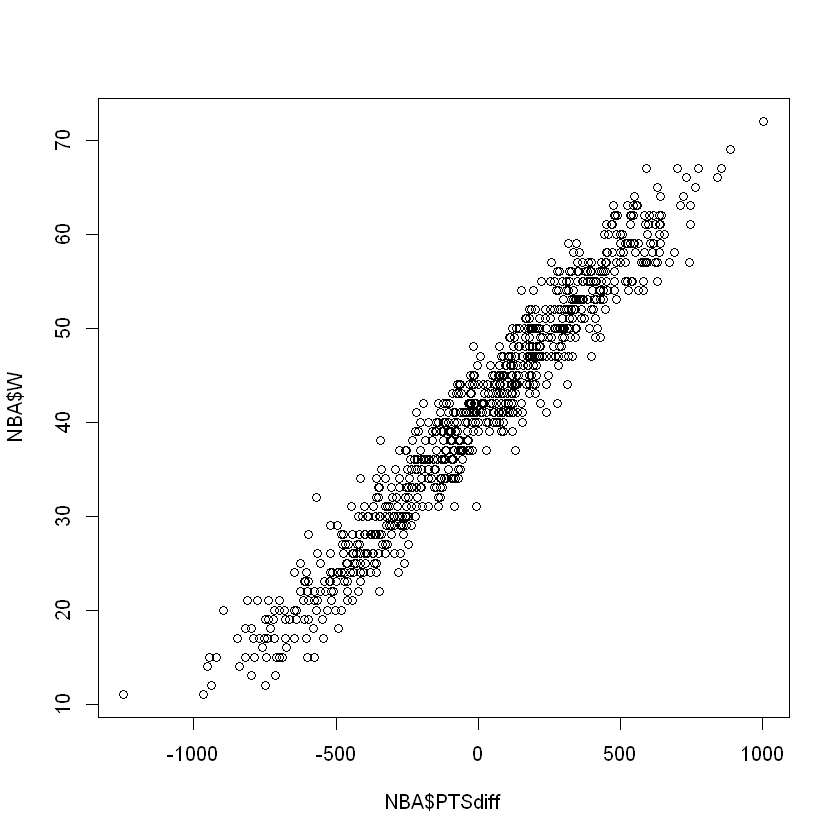

In [29]:
NBA$PTSdiff = NBA$PTS - NBA$oppPTS
plot(NBA$PTSdiff, NBA$W)

线性回归的R方很高。

In [31]:
WinsReg = lm(W ~ PTSdiff, data=NBA)
summary(WinsReg)


Call:
lm(formula = W ~ PTSdiff, data = NBA)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.7393 -2.1018 -0.0672  2.0265 10.6026 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.100e+01  1.059e-01   387.0   <2e-16 ***
PTSdiff     3.259e-02  2.793e-04   116.7   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.061 on 833 degrees of freedom
Multiple R-squared:  0.9423,	Adjusted R-squared:  0.9423 
F-statistic: 1.361e+04 on 1 and 833 DF,  p-value: < 2.2e-16


$W = 41 + 0.0326 * PTSdiff$

要想赢42场以上，`PTSdiff`应在30.67以上。

### 建立预测得分的线性回归模型

In [32]:
PointsReg = lm(PTS ~ X2PA + X3PA + FTA + AST + ORB + DRB + TOV + STL + BLK, data=NBA)
summary(PointsReg)


Call:
lm(formula = PTS ~ X2PA + X3PA + FTA + AST + ORB + DRB + TOV + 
    STL + BLK, data = NBA)

Residuals:
    Min      1Q  Median      3Q     Max 
-527.40 -119.83    7.83  120.67  564.71 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.051e+03  2.035e+02 -10.078   <2e-16 ***
X2PA         1.043e+00  2.957e-02  35.274   <2e-16 ***
X3PA         1.259e+00  3.843e-02  32.747   <2e-16 ***
FTA          1.128e+00  3.373e-02  33.440   <2e-16 ***
AST          8.858e-01  4.396e-02  20.150   <2e-16 ***
ORB         -9.554e-01  7.792e-02 -12.261   <2e-16 ***
DRB          3.883e-02  6.157e-02   0.631   0.5285    
TOV         -2.475e-02  6.118e-02  -0.405   0.6859    
STL         -1.992e-01  9.181e-02  -2.169   0.0303 *  
BLK         -5.576e-02  8.782e-02  -0.635   0.5256    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 185.5 on 825 degrees of freedom
Multiple R-squared:  0.8992,	Adjusted R-squared:  0.8981 
F-sta

In [34]:
SSE = sum(PointsReg$residuals^2)
SSE

[1] 28394314

In [35]:
RMSE = sqrt(SSE/nrow(NBA))
RMSE

[1] 184.4049

In [37]:
mean(NBA$PTS)

[1] 8370.24

移除不显著的自变量。先移除p值最大的失误。

In [38]:
PointsReg2 = lm(PTS ~ X2PA + X3PA + FTA + AST + ORB + DRB + STL + BLK, data=NBA)
summary(PointsReg2)


Call:
lm(formula = PTS ~ X2PA + X3PA + FTA + AST + ORB + DRB + STL + 
    BLK, data = NBA)

Residuals:
    Min      1Q  Median      3Q     Max 
-526.79 -121.09    6.37  120.74  565.94 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.077e+03  1.931e+02 -10.755   <2e-16 ***
X2PA         1.044e+00  2.951e-02  35.366   <2e-16 ***
X3PA         1.263e+00  3.703e-02  34.099   <2e-16 ***
FTA          1.125e+00  3.308e-02  34.023   <2e-16 ***
AST          8.861e-01  4.393e-02  20.173   <2e-16 ***
ORB         -9.581e-01  7.758e-02 -12.350   <2e-16 ***
DRB          3.892e-02  6.154e-02   0.632   0.5273    
STL         -2.068e-01  8.984e-02  -2.301   0.0216 *  
BLK         -5.863e-02  8.749e-02  -0.670   0.5029    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 185.4 on 826 degrees of freedom
Multiple R-squared:  0.8991,	Adjusted R-squared:  0.8982 
F-statistic: 920.4 on 8 and 826 DF,  p-value: < 2.2e-16


In [41]:
PointsReg3 = lm(PTS ~ X2PA + X3PA + FTA + AST + ORB + STL + BLK, data=NBA)
summary(PointsReg3)


Call:
lm(formula = PTS ~ X2PA + X3PA + FTA + AST + ORB + STL + BLK, 
    data = NBA)

Residuals:
    Min      1Q  Median      3Q     Max 
-523.79 -121.64    6.07  120.81  573.64 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.015e+03  1.670e+02 -12.068  < 2e-16 ***
X2PA         1.048e+00  2.852e-02  36.753  < 2e-16 ***
X3PA         1.271e+00  3.475e-02  36.568  < 2e-16 ***
FTA          1.128e+00  3.270e-02  34.506  < 2e-16 ***
AST          8.909e-01  4.326e-02  20.597  < 2e-16 ***
ORB         -9.702e-01  7.519e-02 -12.903  < 2e-16 ***
STL         -2.276e-01  8.356e-02  -2.724  0.00659 ** 
BLK         -3.882e-02  8.165e-02  -0.475  0.63462    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 185.4 on 827 degrees of freedom
Multiple R-squared:  0.8991,	Adjusted R-squared:  0.8982 
F-statistic:  1053 on 7 and 827 DF,  p-value: < 2.2e-16


In [42]:
PointsReg4 = lm(PTS ~ X2PA + X3PA + FTA + AST + ORB + STL, data=NBA)
summary(PointsReg4)


Call:
lm(formula = PTS ~ X2PA + X3PA + FTA + AST + ORB + STL, data = NBA)

Residuals:
    Min      1Q  Median      3Q     Max 
-523.33 -122.02    6.93  120.68  568.26 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.033e+03  1.629e+02 -12.475  < 2e-16 ***
X2PA         1.050e+00  2.829e-02  37.117  < 2e-16 ***
X3PA         1.273e+00  3.441e-02  37.001  < 2e-16 ***
FTA          1.127e+00  3.260e-02  34.581  < 2e-16 ***
AST          8.884e-01  4.292e-02  20.701  < 2e-16 ***
ORB         -9.743e-01  7.465e-02 -13.051  < 2e-16 ***
STL         -2.268e-01  8.350e-02  -2.717  0.00673 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 185.3 on 828 degrees of freedom
Multiple R-squared:  0.8991,	Adjusted R-squared:  0.8983 
F-statistic:  1229 on 6 and 828 DF,  p-value: < 2.2e-16


In [43]:
SSE_4 = sum(PointsReg4$residuals^2)
SSE_4

[1] 28421465

In [44]:
RMSE_4 = sqrt(SSE_4/nrow(NBA))
RMSE_4

[1] 184.493

### 预测胜场

In [45]:
NBA_test = read.csv("./data/NBA_test.csv")

In [46]:
PointsPredictions = predict(PointsReg4, newdata=NBA_test)

In [48]:
SSE = sum((PointsPredictions - NBA_test$PTS)^2)
SST = sum((mean(NBA$PTS) - NBA_test$PTS)^2)
R2 = 1 - SSE / SST
R2

[1] 0.6518975